In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

node = "Low"  # Adjust as needed
filestem = "LOW_1336-4024_beam0000_unblanked"
unblankedfile = "LOW_1336-4024_beam0000_unblanked"

print("**********************************")
print("Beginning quick node plotter for:", node + "/" + filestem + "/" + unblankedfile) 
print("**********************************")

# Read your unblanked bliss results file

bliss_results = pd.read_csv(
    filestem + ".dat",
    skiprows=9,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

unblanked_bliss_results = pd.read_csv(
    unblankedfile + ".dat",
    skiprows=9,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

filtered_bliss = bliss_results[(bliss_results['Drift_Rate'] >= 0.05) & (bliss_results['Drift_Rate'] <= 1.5)]

print(filtered_bliss)

**********************************
Beginning quick node plotter for: Low/LOW_1336-4024_beam0000_unblanked/LOW_1336-4024_beam0000_unblanked
**********************************


/var/folders/z0/kkt653vs1rscq9_7hh77yyyr0000gn/T/ipykernel_3715/1203419494.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bliss_results = pd.read_csv(
/var/folders/z0/kkt653vs1rscq9_7hh77yyyr0000gn/T/ipykernel_3715/1203419494.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  unblanked_bliss_results = pd.read_csv(


          Top_Hit_#  Drift_Rate         SNR  Uncorrected_Frequency
3                10    0.694753   15.661238             999.842431
4                11    0.088423   22.331272             999.978462
7                14    0.480011   15.100116             999.978469
13               20    0.113687   44.853806            1000.004082
17               24    0.082107   25.388191            1000.004290
...             ...         ...         ...                    ...
28417002         85    0.852651   86.013840            8336.002748
28417004         87    1.477929   15.522194            8336.013403
28417005         88    1.421085  213.289383            8335.998543
28417027          1    0.284217   19.132196            8648.000264
28417029          3    0.170530   90.635178            8648.000001

[5604282 rows x 4 columns]


In [2]:
lol = unblanked_bliss_results[(unblanked_bliss_results['Uncorrected_Frequency'] >= 3702)]
print(lol)


          Top_Hit_#  Drift_Rate         SNR  Uncorrected_Frequency
28053466          1   -0.625278   20.957731            4199.984677
28053467          2   -0.227374   17.178114            4199.984006
28053468          3    1.364242   15.852699            4199.982213
28053469          4   -0.170530   37.346916            4199.837555
28053470          5   -0.056843  160.104843            4199.896575
...             ...         ...         ...                    ...
28417025          6    3.012701   31.374090            8518.341591
28417026          7    1.534772   15.586531            8571.649154
28417027          1    0.284217   19.132196            8648.000264
28417028          2   -0.738964   15.000870            8647.971904
28417029          3    0.170530   90.635178            8648.000001

[2798 rows x 4 columns]


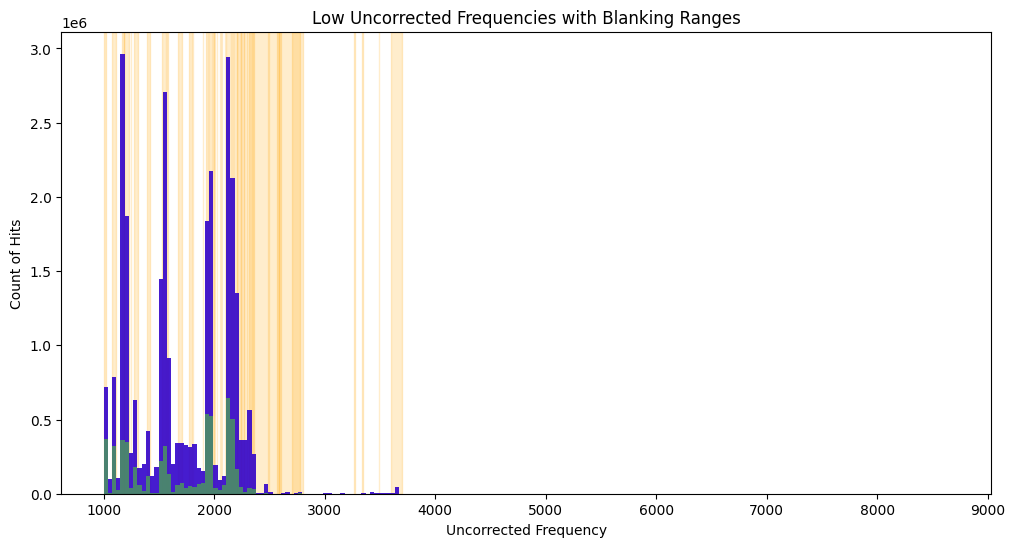

In [3]:
#LOW
blanking_rangeslow = [[1000, 1025],[1075, 1116],[1168, 1184.3],[1187, 1227],[1246, 1250],[1275, 1314],[1395, 1420.5],[1525, 1562],
                      [1572, 1580],[1671, 1705],[1775, 1802],[1811, 1813],[1899, 1901],[1927, 1945],[1951, 1980],[1990, 1996],
                      [1999, 2000.5],[2010, 2011],[2022, 2023],[2049, 2054],[2062.3, 2062.8],[2067.3, 2067.8],[2097, 2098],
                      [2110, 2154.6],[2166, 2169.5],[2179, 2203.5],[2211, 2212],[2226, 2227.5],[2237, 2241],[2244, 2248],[2257, 2258],
                      [2269, 2270.3],[2271.3, 2779],[2299, 2301],[2316, 2345],[2353, 2359.5],[2484, 2488],[2497.25, 2498.5],
                      [2565.75, 2585],[2590, 2609],[2705, 2800],[3264, 3274],[3341, 3343],[3492, 3493],[3600, 3702]]

plt.figure(figsize=(12, 6))

for start, end in blanking_rangeslow:
    plt.axvspan(start, end, color='orange', alpha=0.2, label='Blanking Range' if start == blanking_rangeslow[0][0] else "")

plt.hist(unblanked_bliss_results['Uncorrected_Frequency'], bins=200, color='#e41a1c', alpha=0.7)

plt.hist(bliss_results['Uncorrected_Frequency'], bins=200, color='blue', alpha=0.7)

plt.hist(filtered_bliss['Uncorrected_Frequency'], bins=200, color='#4daf4a', alpha=0.7)

plt.xlabel('Uncorrected Frequency')  
plt.ylabel('Count of Hits')
#plt.xlim(992, 3725)                      
plt.title(f'{node} Uncorrected Frequencies with Blanking Ranges')  


plt.show()

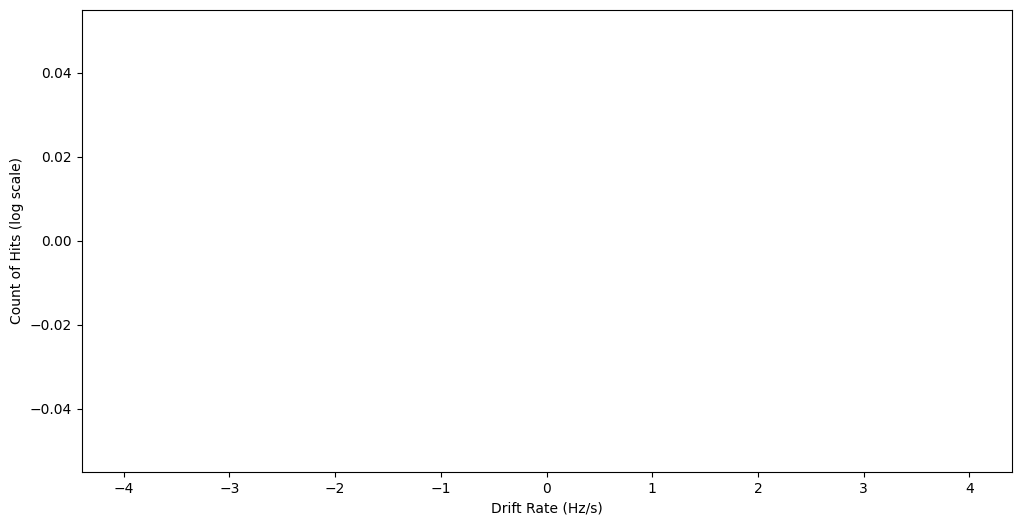

In [2]:
# Histogram of the Drift Rate

bin = np.linspace(-4, 4, 150)

plt.figure(figsize=(12, 6))
plt.hist(unblanked_bliss_results['Uncorrected_Frequency'], bins=bin, color='#e41a1c', alpha=0.7)
plt.hist(bliss_results['Uncorrected_Frequency'], bins=bin, color='blue', alpha=0.7)
plt.hist(filtered_bliss['Uncorrected_Frequency'], bins=bin, color='#4daf4a', alpha=0.7)
#plt.xlim(-4, 4)
plt.xlabel('Drift Rate (Hz/s)')  
plt.ylabel('Count of Hits (log scale)')                     
#plt.title(f'{node} Drift Rates')  


plt.show()

In [ ]:
# Histogram of the SNR

bin = np.linspace(0, 2000, 150)

plt.figure(figsize=(12, 6))
plt.hist(unblanked_bliss_results['SNR'], log=True, bins=bin, color='#e41a1c', alpha=0.7)
plt.hist(bliss_results['SNR'], log=True, bins=bin, color='blue', alpha=0.7)
plt.hist(filtered_bliss['SNR'], log=True, bins=bin, color='#4daf4a', alpha=0.7)
plt.xlim(right=2000)
plt.xlabel('SNR')  
plt.ylabel('Count of Hits (log scale)')                     
#plt.title('Signal-to-Noise Ratio (SNR) from 1-9 MHz')


plt.show()